# Intro to Multiple Linear Regression

In this notebook, we'll be working with data on sales prices for homes in King County, Washington. This dataset was obtained from https://www.kaggle.com/harlfoxem/housesalesprediction.

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [105]:
kc = pd.read_csv('../data/kc_house_data.csv')

First, let's take a look at the dataset.

In [108]:
pd.set_option('display.max_columns', 500)

In [109]:
kc

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [110]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

The columsn are as follows:

* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

**Target:** price

**Numeric Predictors:** bedrooms, bathrooms, sqft_living, sqft_lot, floors, view, condition, grade, sqft_above, sqft_basement, yr_built, lat, long, sqft_living15, sqft_lot15

**Categorical Predictors:** waterfront, zipcode

We'll start with a model using all predictors, but without really looking at the data.

In [119]:
X = kc[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]
y = kc['price']

We do have one variable that we need to take care of before modeling - the zipcode. It is a categorical variable, so we need to encode it. The simplest option is to one-hot encode it. This means that we will create a column for each possible value and then for each row, put a one in that column and a zero in all others.

To accomplish this, we can use the `get_dummies` function from pandas.

In [120]:
# use `get_dummies` to one-hot encode the zipcode var
X = pd.get_dummies(X, columns = ['zipcode'], drop_first=True)

Now, let's split our data into a training set and a test set.

In [125]:
# train/test split code here
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state = 42, test_size=0.25
)

In [126]:
# LinearRegression code here
linreg = LinearRegression().fit(X_train, y_train)

Let' see how we did. First, we can look at mean squared error.

In [127]:
mean_squared_error(y_test, linreg.predict(X_test))

28803718071.41293

Then in terms of root mean squared error.

In [128]:
np.sqrt(mean_squared_error(y_test, linreg.predict(X_test)))

169716.58160419366

As discussed in the slides, we an also look at mean absolute error, mean absolte percentage error, or $R^2$.

In [129]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import r2_score

In [130]:
mean_absolute_error(y_test, linreg.predict(X_test))

97818.99158969632

In [131]:
mean_absolute_percentage_error(y_test, linreg.predict(X_test))

0.19446683143277355

In [132]:
r2_score(y_test, linreg.predict(X_test))

0.8074458485281089

Let's look at some plots to try to get a better idea about what our model is doing.

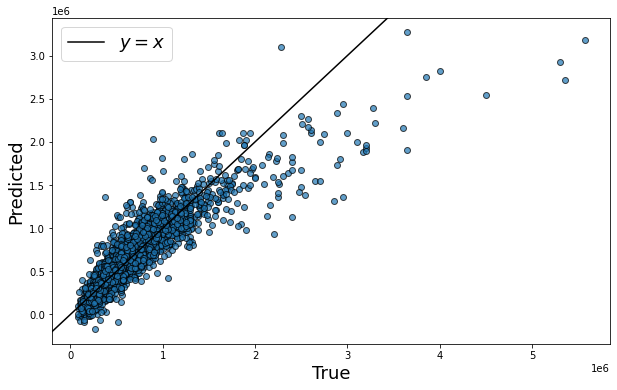

In [133]:
plt.figure(figsize = (10,6))

plt.scatter(y_test, linreg.predict(X_test), alpha = 0.7, edgecolor = 'black')

fontsize = 18
plt.xlabel('True', fontsize = fontsize)
plt.ylabel('Predicted', fontsize = fontsize)

ymin, ymax = plt.ylim()
xmin, xmax = plt.xlim()

start = min(xmin, ymin)
stop = max(xmax, ymax)
plt.plot([start, stop], [start, stop], color = 'black', label = '$y = x$')
plt.legend(fontsize = fontsize)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax);

**What do we notice?**

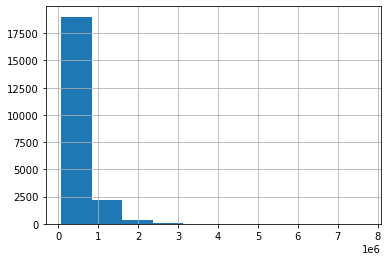

In [135]:
kc.price.hist();

In [134]:
kc.price.skew()

4.024069144684712

This indicates that the prices are strongly positively skewed. Since we are using a linear regression model which is minimizing mean squared error, these large prices can have a big influence on the final fit.

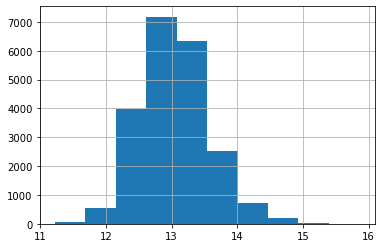

In [136]:
np.log(kc.price).hist();

In [137]:
np.log(kc.price).skew()

0.42807247557592526

It is still a bit positively skewed, but not majorly so. Let's see what happens when we fit our model on the log-transformed price.

In [166]:
# LinearRegression with log-transformed price here
linreg = LinearRegression().fit(X_train, np.log(y_train))

Note that we need to undo the log transformation prior to calculating the metrics. This puts it back in terms of dollars rather than log dollars.

In [167]:
np.sqrt(mean_squared_error(y_test, np.exp(linreg.predict(X_test))))

215080.4360831552

In [168]:
mean_absolute_error(y_test, np.exp(linreg.predict(X_test)))

80747.75325861084

We did about the same in terms of mean squared error, but quite a bit better in terms of mean absolute error. **Why might that be?**

---

stopping point. tim, this is where you should start next time

---

There is actually a scikit-learn class that can handle the transformation and inverse for us.

In [169]:
from sklearn.compose import TransformedTargetRegressor

In [170]:
ttr = TransformedTargetRegressor(regressor = LinearRegression(), 
                                 func = np.log,
                                 inverse_func = np.exp)

In [171]:
# fit the TransformedTargetRegressor here
ttr.fit(X_train, y_train)

TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())

In [172]:
np.sqrt(mean_squared_error(y_test, ttr.predict(X_test)))

215080.4360831552

In [173]:
mean_absolute_error(y_test, ttr.predict(X_test))

80747.75325861084

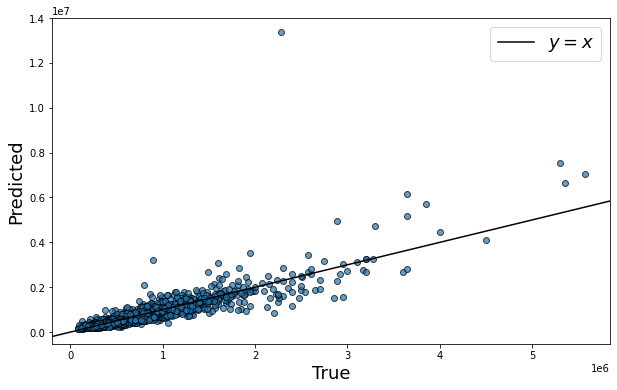

In [176]:
plt.figure(figsize = (10,6))

plt.scatter(y_test, ttr.predict(X_test), alpha = 0.7, edgecolor = 'black')

fontsize = 18
plt.xlabel('True', fontsize = fontsize)
plt.ylabel('Predicted', fontsize = fontsize)

ymin, ymax = plt.ylim()
xmin, xmax = plt.xlim()

start = min(xmin, ymin)
stop = max(xmax, ymax)
plt.plot([start, stop], [start, stop], color = 'black', label = '$y = x$')
plt.legend(fontsize = fontsize)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax);

If we look at some of the features we are using the predict, some of them are also skewed. When using a linear model, it could be beneficial to remove the skewness.

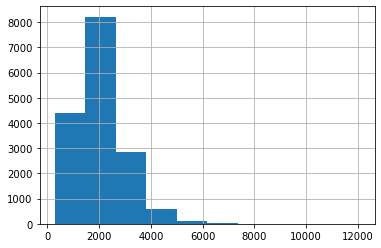

In [177]:
X_train.sqft_living.hist();

While we could log-transform our variables, there is a more general class of power transformations that include log transformations. These are called the Box-Cox transformation (for strictly positive variables) and the Yeo-Johnson transformations for variables that can include non-positive values.

To access these transformations, we can use the PowerTransformer class from the preprocessing module of scikit-learn.

In order to encapsulate these tranformations, we can make use of the Pipeline class and the ColumnTransformer class.

In [46]:
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

First, we'll create a ColumnTransformer. We need to specify what transformations to use and on what columns. We pass these in as a list of tuples, where each tuple is a name, what transformer to use, and the columns to apply it to.

Note also that we need to tell the transformer what to do with all of the other columns. In this case, we'll just pass them through unchanged.

In [47]:
ct = ColumnTransformer(transformers = [
    ('yeo-johnson', PowerTransformer(), ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']),
], remainder = 'passthrough')

Now, we can create a Pipeline that includes this transformer.

In [180]:
# pipeline code here
pipe = Pipeline(steps=[
    ('transform', ct),
    ('linreg', LinearRegression())
])

In [192]:
pipe

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('yeo-johnson',
                                                  PowerTransformer(),
                                                  ['sqft_living', 'sqft_lot',
                                                   'sqft_above',
                                                   'sqft_basement']),
                                                 ('poly',
                                                  PolynomialFeatures(include_bias=False),
                                                  ['sqft_living', 'sqft_lot',
                                                   'sqft_above',
                                                   'sqft_basement', 'bedrooms',
                                                   'bathrooms', 'floors'])])),
                ('linreg', LinearRegression())])

First, let's fit it on the regular (non-logged) prices.

In [193]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('yeo-johnson',
                                                  PowerTransformer(),
                                                  ['sqft_living', 'sqft_lot',
                                                   'sqft_above',
                                                   'sqft_basement']),
                                                 ('poly',
                                                  PolynomialFeatures(include_bias=False),
                                                  ['sqft_living', 'sqft_lot',
                                                   'sqft_above',
                                                   'sqft_basement', 'bedrooms',
                                                   'bathrooms', 'floors'])])),
                ('linreg', LinearRegression())])

In [194]:
np.sqrt(mean_squared_error(y_test, pipe.predict(X_test)))

172092.66377822764

In [195]:
mean_absolute_error(y_test, pipe.predict(X_test))

90193.20270574951

Then, let's try it on the logged prices.

In [198]:
ttr = TransformedTargetRegressor(regressor = pipe, func = np.log, inverse_func = np.exp)

In [199]:
ttr.fit(X_train, y_train)

TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=Pipeline(steps=[('transform',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        transformers=[('yeo-johnson',
                                                                                       PowerTransformer(),
                                                                                       ['sqft_living',
                                                                                        'sqft_lot',
                                                                                        'sqft_above',
                                                                                        'sqft_basement']),
                                                                                      ('poly',
                                             

In [201]:
np.sqrt(mean_squared_error(y_test, ttr.predict(X_test)))

133859.8814991873

In [202]:
mean_absolute_error(y_test, ttr.predict(X_test))

73805.20515893081

There are a number of other transformations we could try. For example, we might want to try mixing in some polynomial features. This can be done by adding the PolynomialFeatures class to our column transformer.

In [203]:
from sklearn.preprocessing import PolynomialFeatures

In [204]:
ct = ColumnTransformer(transformers = [
    ('yeo-johnson', PowerTransformer(), ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']),
    ('poly', PolynomialFeatures(degree = 2, include_bias = False), ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'bedrooms', 'bathrooms', 'floors'])
], remainder = 'passthrough')

pipe = Pipeline(steps = [
    ('transform', ct),
    ('linear', LinearRegression())
])

In [212]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('yeo-johnson',
                                                  PowerTransformer(),
                                                  ['sqft_living', 'sqft_lot',
                                                   'sqft_above',
                                                   'sqft_basement']),
                                                 ('poly',
                                                  PolynomialFeatures(include_bias=False),
                                                  ['sqft_living', 'sqft_lot',
                                                   'sqft_above',
                                                   'sqft_basement', 'bedrooms',
                                                   'bathrooms', 'floors'])])),
                ('linear', LinearRegression())])

In [213]:
np.sqrt(mean_squared_error(y_test, pipe.predict(X_test)))

172092.66377822764

In [214]:
mean_absolute_error(y_test, pipe.predict(X_test))

90193.20270574951

In [216]:
ttr = TransformedTargetRegressor(regressor = pipe, func = np.log, inverse_func = np.exp)

In [217]:
ttr.fit(X_train, y_train)

TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=Pipeline(steps=[('transform',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        transformers=[('yeo-johnson',
                                                                                       PowerTransformer(),
                                                                                       ['sqft_living',
                                                                                        'sqft_lot',
                                                                                        'sqft_above',
                                                                                        'sqft_basement']),
                                                                                      ('poly',
                                             

In [218]:
np.sqrt(mean_squared_error(y_test, ttr.predict(X_test)))

133859.8814991873

In [219]:
mean_absolute_error(y_test, ttr.predict(X_test))

73805.20515893081

Finally, let's think about the lat/long features. Currently, the model will look for a linear relationship between them and the target. However, there might be a nonlinear relationship that we can capture by including them in our polynomial features. To keep the values from getting too large, it might be a good idea to also pass lat/long through a MinMaxScaler, which will squish them into the interval [0,1].

In [65]:
from sklearn.preprocessing import MinMaxScaler

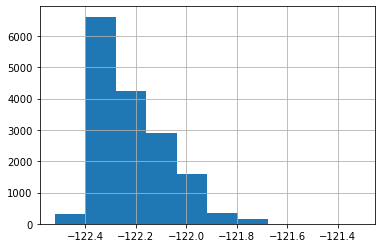

In [229]:
X_train['long'].hist()

In [246]:
ct = ColumnTransformer(transformers = [
    ('yeo-johnson', PowerTransformer(), ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']),
    ('minmax', MinMaxScaler(), ['lat', 'long']),
    ('poly', PolynomialFeatures(degree = 2, include_bias = False), 
     ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'bedrooms', 'bathrooms', 'floors', 'lat', 'long'])
], remainder = 'passthrough')

pipe = Pipeline(steps = [
    ('transform', ct),
    ('linear', LinearRegression())
])

In [247]:
ttr = TransformedTargetRegressor(regressor = pipe, func = np.log, inverse_func = np.exp)
ttr.fit(X_train, y_train)

TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=Pipeline(steps=[('transform',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        transformers=[('yeo-johnson',
                                                                                       PowerTransformer(),
                                                                                       ['sqft_living',
                                                                                        'sqft_lot',
                                                                                        'sqft_above',
                                                                                        'sqft_basement']),
                                                                                      ('minmax',
                                           

In [239]:
MinMaxScaler().fit_transform(X_train[['long']])

array([[0.27574751],
       [0.27574751],
       [0.17109635],
       ...,
       [0.40448505],
       [0.1627907 ],
       [0.34883721]])

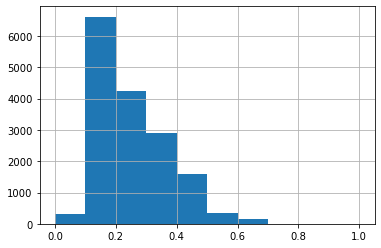

In [243]:
pd.Series([i[0] for i in MinMaxScaler().fit_transform(X_train[['long']])]).hist()

In [248]:
np.sqrt(mean_squared_error(y_test, ttr.predict(X_test)))

132699.11878858847

In [249]:
mean_absolute_error(y_test, ttr.predict(X_test))

72872.53008153291

What we have seen is that based on our current data split, the model that uses polynomial features seems to give the best results (in terms of mean absolute error). 

But what if that is just the case on that particular split? Plus, we have now reused the same test set over and over. how can we be more sure about which is the best model that we have so far?

One option is to use the cross_val_score.

The way that **k-fold cross validation** works is that the data is divided into $k$ equal-sized pieces. Then for $k$ iterations, a model is fit on all but one of those pieces and then evaluated on the held-out piece.

<img src="images/kfold.png">

To be extra sure, we'll use repeated k-fold cross validation where the data is split multiple times and is shuffled between each split.

In [251]:
from sklearn.model_selection import cross_val_score, RepeatedKFold

In [252]:
cv = RepeatedKFold(n_splits = 5, n_repeats = 10, random_state = 321)

In [253]:
results = {}

In [256]:
cvs = cross_val_score(estimator = LinearRegression(), X = X, y = y,
                      scoring = 'neg_mean_absolute_error',
                     cv = cv)
results['Baseline'] = -cvs

Let's compare to the log-transformed target.

In [257]:
# ttr = TransformedTargetRegressor(?)

cvs = cross_val_score(estimator = ttr, X = X, y = y, 
                      scoring = 'neg_mean_absolute_error',
                     cv = cv)

results['Log_Price'] = -cvs

Let's see what happens when we transform some of the predictors.

In [258]:
ct = ColumnTransformer(transformers = [
    ('yeo-johnson', PowerTransformer(), ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']),
], remainder = 'passthrough')

pipe = Pipeline(steps = [
    ('transform', ct),
    ('linear', LinearRegression())
])

ttr = TransformedTargetRegressor(regressor = pipe, func = np.log, inverse_func = np.exp)

# cvs = cross_val_score(?)

results['Log_Price_Transformed_Predictors'] = -cvs

Now, the polynomial features.

In [259]:
ct = ColumnTransformer(transformers = [
    ('yeo-johnson', PowerTransformer(), ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']),
    ('poly', PolynomialFeatures(include_bias = False), 
     ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'bedrooms', 'bathrooms', 'floors'])
], remainder = 'passthrough')

# pipe = Pipeline(?)

ttr = TransformedTargetRegressor(regressor = pipe, func = np.log, inverse_func = np.exp)

cvs = cross_val_score(estimator = ttr, X = X, y = y, 
                      scoring = 'neg_mean_absolute_error',
                     cv = cv)

results['Poly_Features'] = -cvs

And, finally, the polynomial features using lat/long.

In [260]:
ct = ColumnTransformer(transformers = [
    ('yeo-johnson', PowerTransformer(), ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']),
    ('minmax', MinMaxScaler(), ['lat', 'long']),
    ('poly', PolynomialFeatures(degree = 2, include_bias = False), 
     ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'bedrooms', 'bathrooms', 'floors', 'lat', 'long'])
], remainder = 'passthrough')

pipe = Pipeline(steps = [
    ('transform', ct),
    ('linear', LinearRegression())
])

ttr = TransformedTargetRegressor(regressor = pipe, func = np.log, inverse_func = np.exp)

cvs = cross_val_score(estimator = ttr, X = X, y = y, 
                      scoring = 'neg_mean_absolute_error',
                     cv = cv)

results['Poly_Features_Lat/Long'] = -cvs

In [261]:
import seaborn as sns

In [262]:
res = pd.DataFrame()
for key in results.keys():
    res = res.append(pd.DataFrame({'model': key, 'mae': results[key]}))

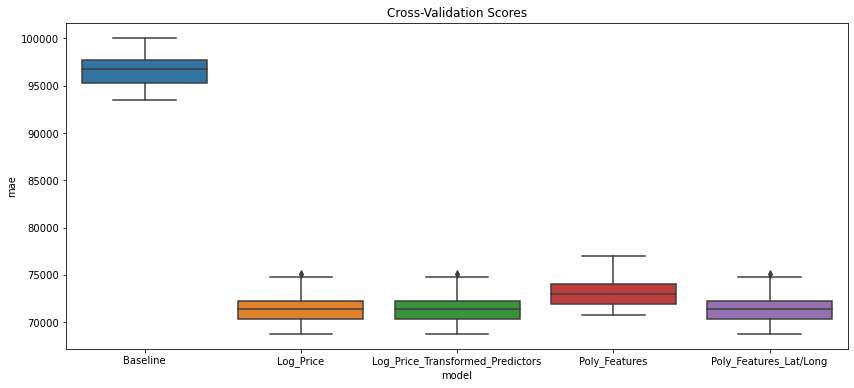

In [264]:
plt.figure(figsize = (14,6))
sns.boxplot(data = res, x = 'model', y = 'mae')
plt.title('Cross-Validation Scores');

Based on these results, we can be fairly confident that the model using polynomial features including lat/long will yield the best generalization error out of the models tried.